# Machine Learning Models for Diabetes Prediction

## Overview
This notebook applies and evaluates multiple Machine Learning models to predict the likelihood of diabetes using the **BRFSS 2015 Diabetes Health Indicators** dataset (feature-engineered and ML-ready version).

We will test three different algorithms:
1. **Random Forest Classifier** – A robust, non-linear ensemble model that handles feature interactions well.
2. **Gradient Boosting Classifier** – Another ensemble tree-based method that builds models sequentially for improved performance.
3. **Linear Regression (thresholded)** – *Included for educational comparison only*. Linear Regression is **not suited** for binary classification, but is included here to meet assessment requirements and to demonstrate why correct algorithm selection matters.

## Goals
- Compare different algorithms on accuracy, precision, recall, F1-score, and ROC-AUC.
- Identify the best-performing model for this dataset.
- Save model evaluation metrics and predictions for later use in Tableau and the project README.

**Note:** Logistic Regression was previously implemented in the Feature Engineering notebook as an initial baseline and will not be repeated here.

## 1. Import Libraries and Load Data

We first import the required libraries for data handling, modelling, evaluation, and visualisation.  
We will load the **ML-ready** dataset (`combined_ml_ready.csv`) created in earlier stages of the project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve,
    mean_squared_error, r2_score
)

# Load ML-ready dataset
df = pd.read_csv("../data/combined_ml_ready.csv")

# Define target and features
target = "Diabetes_binary"
X = df.drop(columns=[target])
y = df[target]

# Train/validation/test split (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

X_train.shape, X_val.shape, X_test.shape

((316987, 39), (105662, 39), (105663, 39))

## 2. Helper Functions

These functions will:
- Evaluate classification models on standard metrics.
- Print confusion matrices and classification reports.
- Store results for later comparison and export.

In [ ]:
# Initialise results list to store metrics for each model
results_list = []

def evaluate_model(model_name, y_true, y_pred, y_prob, dataset):
    """Calculate and store classification metrics for later comparison."""
    metrics = {
        "model": model_name,
        "dataset": dataset,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_true, y_prob)
    }
    results_list.append(metrics)
    return metrics

def print_cm_and_report(y_true, y_pred, title):
    """Display confusion matrix and classification report."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print(classification_report(y_true, y_pred))

## 3. Random Forest Classifier

Random Forest is a non-linear ensemble model that:
- Builds many decision trees and averages their predictions.
- Handles large numbers of features well.
- Provides feature importance scores.

We will train it, evaluate on validation and test sets, and store the metrics.

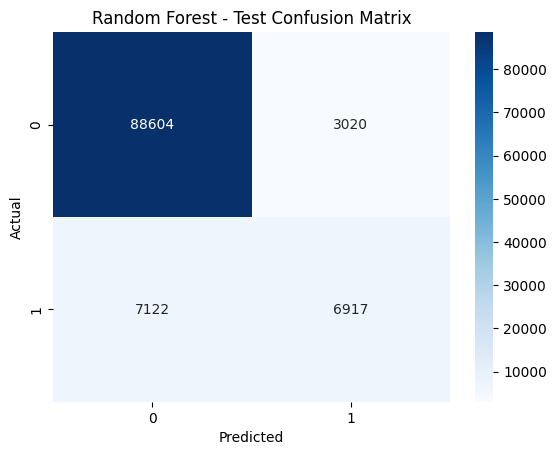

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     91624
         1.0       0.70      0.49      0.58     14039

    accuracy                           0.90    105663
   macro avg       0.81      0.73      0.76    105663
weighted avg       0.90      0.90      0.90    105663



In [4]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Validation
y_val_pred_rf = rf.predict(X_val)
y_val_prob_rf = rf.predict_proba(X_val)[:, 1]
evaluate_model("Random Forest", y_val, y_val_pred_rf, y_val_prob_rf, "Validation")

# Test
y_test_pred_rf = rf.predict(X_test)
y_test_prob_rf = rf.predict_proba(X_test)[:, 1]
evaluate_model("Random Forest", y_test, y_test_pred_rf, y_test_prob_rf, "Test")

print_cm_and_report(y_test, y_test_pred_rf, "Random Forest - Test Confusion Matrix")

## 4. Gradient Boosting Classifier

Gradient Boosting:
- Builds trees sequentially, each learning from the errors of the previous.
- Often achieves higher accuracy than Random Forest but can be slower to train.

We will train it, evaluate, and store results.

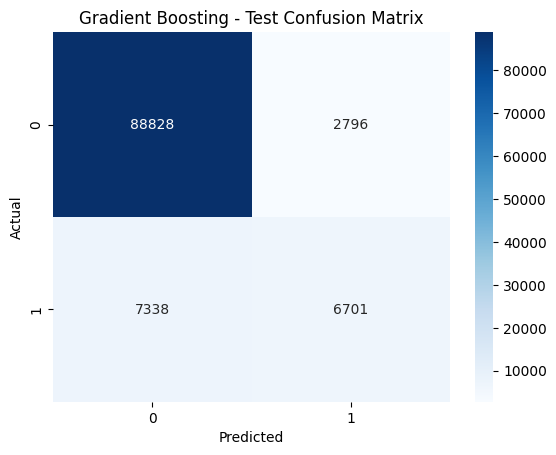

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     91624
         1.0       0.71      0.48      0.57     14039

    accuracy                           0.90    105663
   macro avg       0.81      0.72      0.76    105663
weighted avg       0.89      0.90      0.90    105663



In [5]:
gbc = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbc.fit(X_train, y_train)

# Validation
y_val_pred_gbc = gbc.predict(X_val)
y_val_prob_gbc = gbc.predict_proba(X_val)[:, 1]
evaluate_model("Gradient Boosting", y_val, y_val_pred_gbc, y_val_prob_gbc, "Validation")

# Test
y_test_pred_gbc = gbc.predict(X_test)
y_test_prob_gbc = gbc.predict_proba(X_test)[:, 1]
evaluate_model("Gradient Boosting", y_test, y_test_pred_gbc, y_test_prob_gbc, "Test")

print_cm_and_report(y_test, y_test_pred_gbc, "Gradient Boosting - Test Confusion Matrix")

## 5. Linear Regression (Thresholded)

Although not suited for binary classification:
- We include Linear Regression for educational purposes and requirements.
- Outputs are continuous and will be thresholded at 0.5 to create binary predictions.

Validation MSE: 0.07848314300499236
Validation R²: 0.3188020083874118
Test MSE: 0.07829488975521721
Test R²: 0.320430514967293


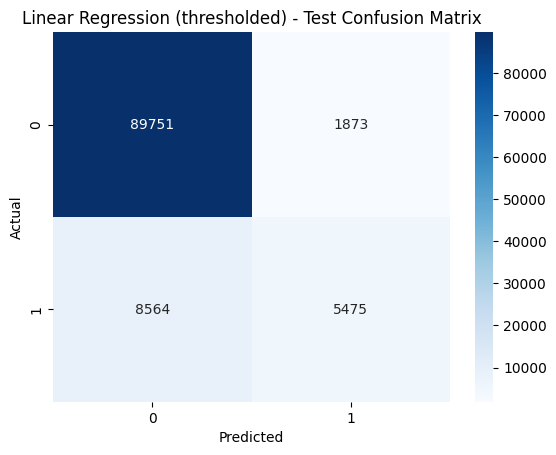

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     91624
         1.0       0.75      0.39      0.51     14039

    accuracy                           0.90    105663
   macro avg       0.83      0.68      0.73    105663
weighted avg       0.89      0.90      0.89    105663



In [7]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Continuous predictions
y_val_cont = linreg.predict(X_val)
y_test_cont = linreg.predict(X_test)

# Regression metrics
print("Validation MSE:", mean_squared_error(y_val, y_val_cont))
print("Validation R²:", r2_score(y_val, y_val_cont))
print("Test MSE:", mean_squared_error(y_test, y_test_cont))
print("Test R²:", r2_score(y_test, y_test_cont))

# Clip and threshold
y_val_prob_lin = np.clip(y_val_cont, 0, 1)
y_test_prob_lin = np.clip(y_test_cont, 0, 1)
y_val_pred_lin = (y_val_prob_lin >= 0.5).astype(int)
y_test_pred_lin = (y_test_prob_lin >= 0.5).astype(int)

# Classification-style metrics
evaluate_model("Linear Regression (thresholded)", y_val, y_val_pred_lin, y_val_prob_lin, "Validation")
evaluate_model("Linear Regression (thresholded)", y_test, y_test_pred_lin, y_test_prob_lin, "Test")

print_cm_and_report(y_test, y_test_pred_lin, "Linear Regression (thresholded) - Test Confusion Matrix")

## 6. Model Comparison Table
We now combine the stored metrics for all models and export them for future use in Tableau and reporting.

In [8]:
metrics_df = pd.DataFrame(results_list)
metrics_df.to_csv("model_metrics_summary.csv", index=False)
metrics_df

,model,dataset,accuracy,precision,recall,f1,roc_auc
0,Random Forest,Validation,0.903210,0.690068,0.492913,0.575061,0.929421
1,Random Forest,Test,0.904016,0.696085,0.492699,0.576994,0.929586
2,Gradient Boosting,Validation,0.902983,0.697045,0.477242,0.566572,0.929965
3,Gradient Boosting,Test,0.904091,0.705591,0.477313,0.569426,0.929828
4,Linear Regression (thresholded),Validation,0.899264,0.728558,0.385426,0.504146,0.910258
5,Linear Regression (thresholded),Test,0.901224,0.745101,0.389985,0.511993,0.909543
6,Linear Regression (thresholded),Validation,0.899264,0.728558,0.385426,0.504146,0.910258
7,Linear Regression (thresholded),Test,0.901224,0.745101,0.389985,0.511993,0.909543
